Testing out custom implemented backpropogation and MLP for binary classification 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.value import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

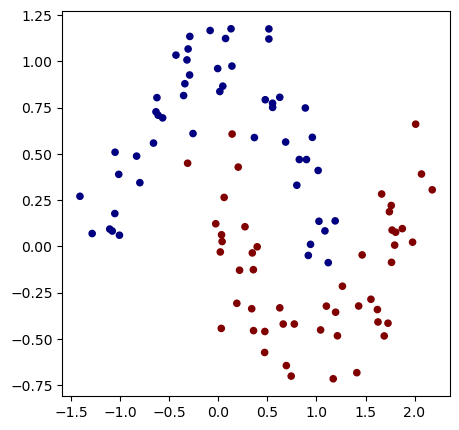

In [30]:
# simulate dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.15)

y = y*2 - 1 # make y be -1 or 1

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plt.show()

In [31]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)

MLP of [Layer of [ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2), ReLU Neuron(2)], Layer of [ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16), ReLU Neuron(16)], Layer of [Linear Neuron(16)]]


In [32]:
# loss function
def loss():
    Xb, yb = X, y
    inputs = [list(map(Value, x_row)) for x_row in Xb]
    scores = list(map(model, inputs)) # forward pass

    # hinge loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses)) # average with extra steps

    # L2 reg
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    # also accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=1.4072438735535844, grad=0) 0.43


In [34]:
# Training loop

for k in range(50):
    total_loss, acc = loss() # forward pass + compute loss
    model.zero_grad() # clear old gradients
    total_loss.backward() # compute gradients 

    # usually would use optimizer to wrap parameters 
    # but can also do manually with stochastic gradient descent
    lr = 0.1
    for p in model.parameters():
        p.data -= lr * p.grad
        
    print(f"step {k}: loss {total_loss.data}, accuracy {acc*100}%")

step 0: loss 1.4072438735535844, accuracy 43.0%
step 1: loss 1.0455528723886651, accuracy 51.0%
step 2: loss 0.8080781001523616, accuracy 60.0%
step 3: loss 0.6657684034761231, accuracy 73.0%
step 4: loss 0.5306203456018536, accuracy 78.0%
step 5: loss 0.4350110119805993, accuracy 84.0%
step 6: loss 0.3955440289879344, accuracy 84.0%
step 7: loss 0.3759656479979181, accuracy 84.0%
step 8: loss 0.3587526425071978, accuracy 85.0%
step 9: loss 0.3471066628221721, accuracy 85.0%
step 10: loss 0.33925810781283067, accuracy 86.0%
step 11: loss 0.3321928058279302, accuracy 86.0%
step 12: loss 0.32570598819024443, accuracy 86.0%
step 13: loss 0.3194965610698366, accuracy 89.0%
step 14: loss 0.31518526458130075, accuracy 89.0%
step 15: loss 0.3112494434747111, accuracy 89.0%
step 16: loss 0.306909566159501, accuracy 89.0%
step 17: loss 0.30224871148616017, accuracy 89.0%
step 18: loss 0.29769324916344764, accuracy 88.0%
step 19: loss 0.2943210878752324, accuracy 88.0%
step 20: loss 0.2909118982

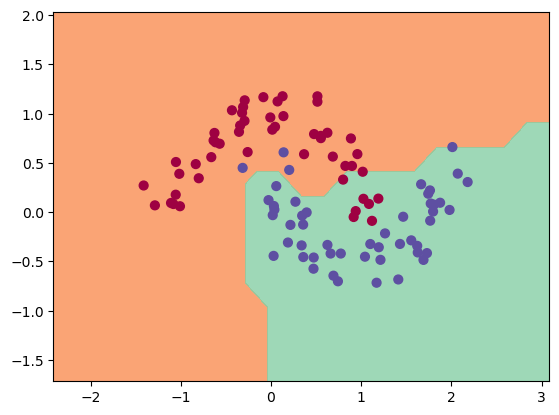

In [35]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()